## **HONEY PRODUCTION MINOR PROJECT**

Q1.Explore quantitative and qualitative variables in the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df = pd.read_csv("/content/honeyproduction.csv") ## Saving the data into df
df.head(20)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


In [2]:
df.state.count() ## Checking how many lines are on the dataset

626

In [3]:
yield_ = df['yieldpercol'].groupby(by=df['year']).sum() 
yield_.head()

year
1998    3008
1999    2815
2000    2906
2001    2840
2002    2939
Name: yieldpercol, dtype: int64

Q2.Find the relationship between numerical variables using pair plots and correlation plots.

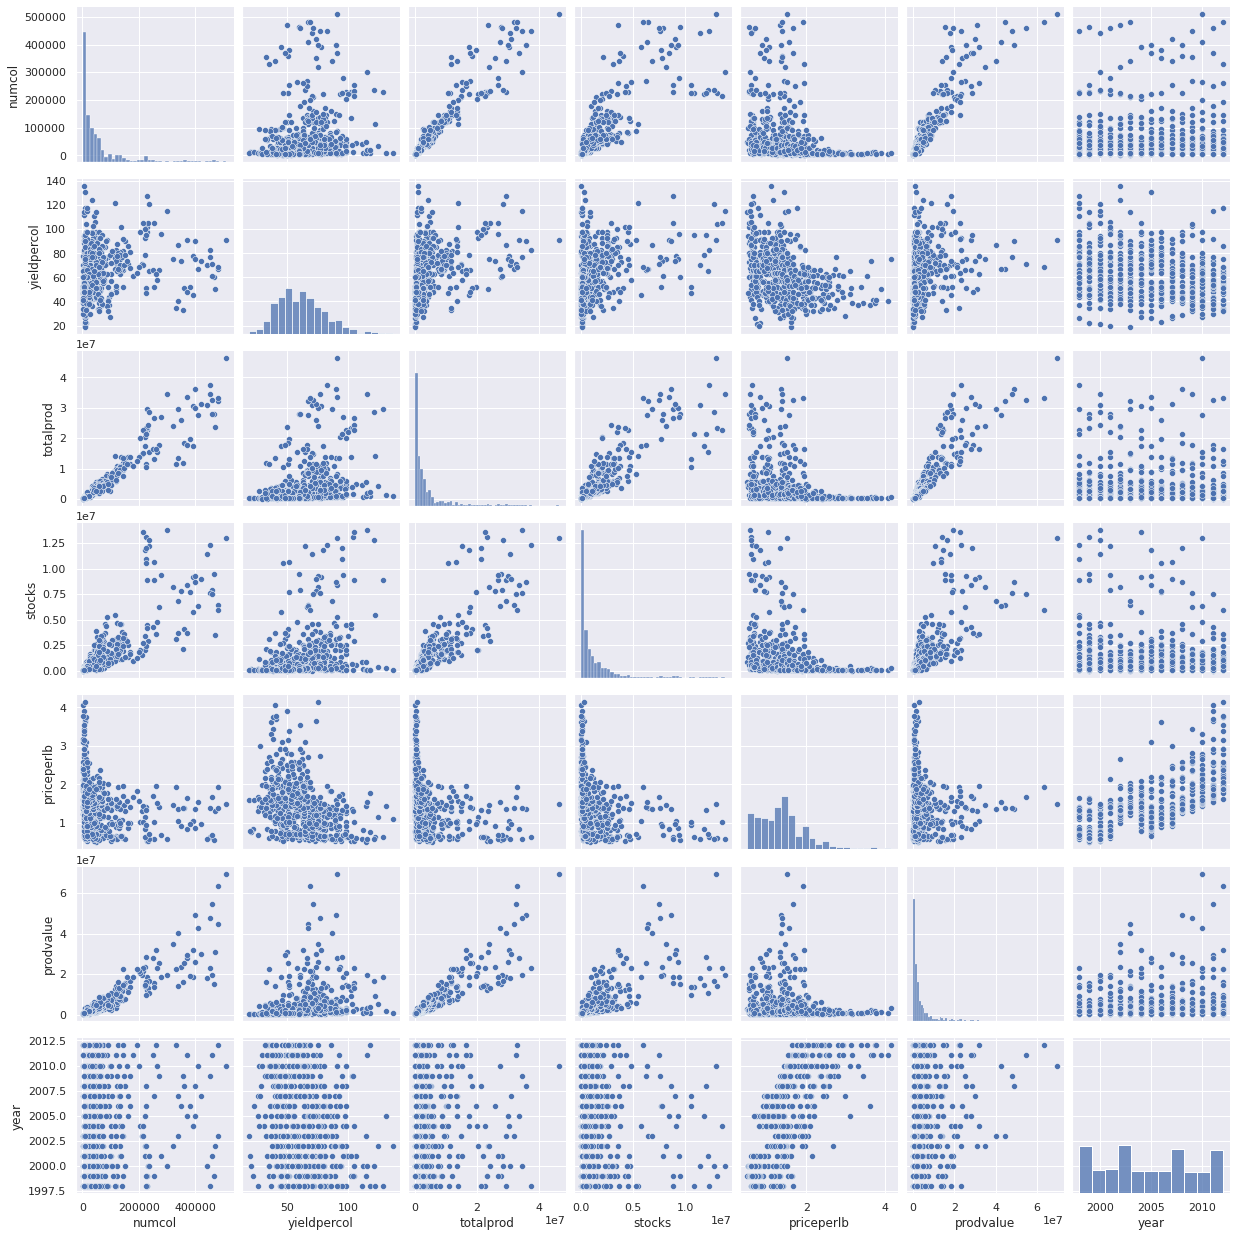

In [4]:
sns.pairplot(df)

Q3.overall trend of the honey production in the US over the years

Text(0, 0.5, 'Yield')

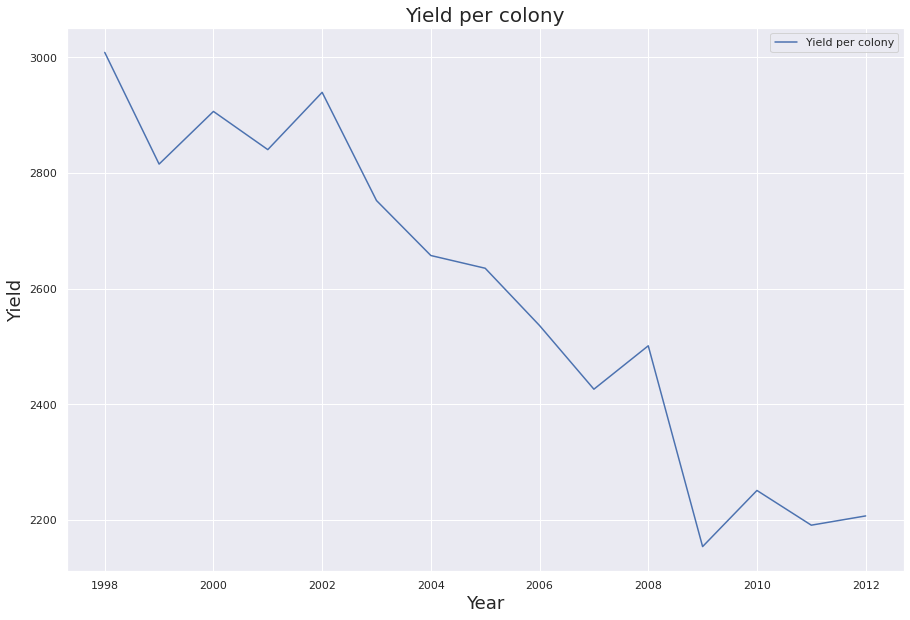

In [5]:

plt.figure(figsize=(15,10))
sns.lineplot(x=yield_.index,y=yield_.values,label='Yield per colony')
plt.title("Yield per colony", size=20)
plt.xlabel("Year", size=18)
plt.ylabel("Yield", size = 18)

Q4.Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

Text(0, 0.5, 'Price')

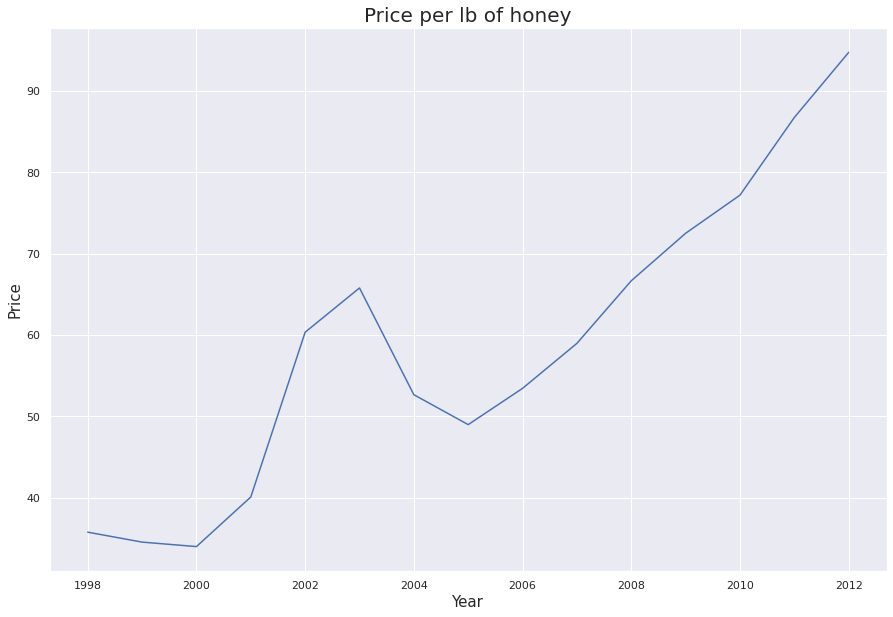

In [6]:
plt.figure(figsize=(15,10))
plt.plot(df['priceperlb'].groupby(by=df['year']).sum())
plt.title("Price per lb of honey", size=20)
plt.xlabel("Year", size = 15)
plt.ylabel("Price", size = 15)

We saw that the production is decreasing year by year, if the demand is the same, the price will go up. This can be seen in the above graphic

Text(0, 0.5, 'Price')

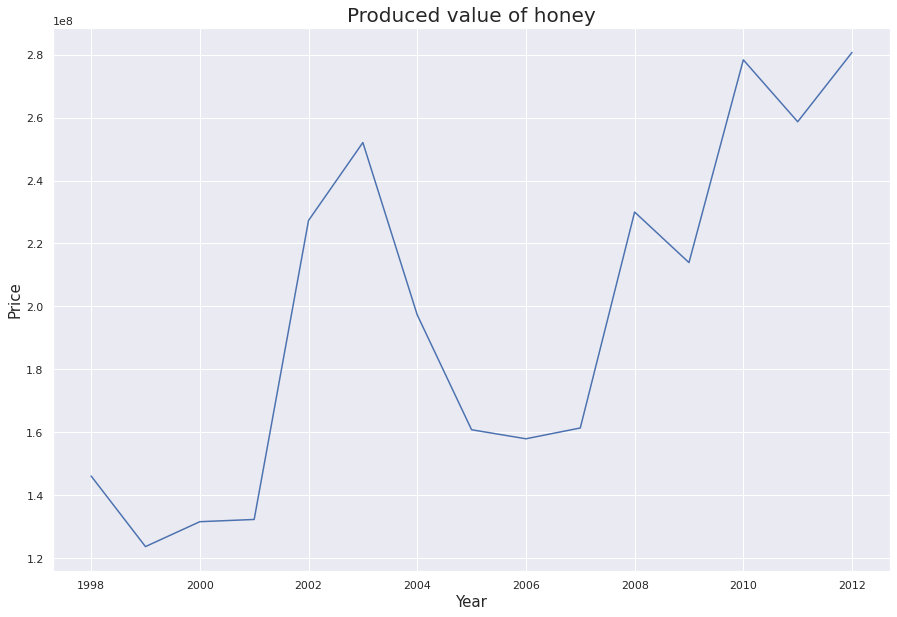

In [7]:
plt.figure(figsize=(15,10))
plt.plot(df['prodvalue'].groupby(by=df['year']).sum())
plt.title("Produced value of honey", size=20)
plt.xlabel("Year", size = 15)
plt.ylabel("Price", size = 15)

We see that the produced value is tied with the Yield per colony and the price per lb. When there's a decrease in Yield, but a increse in price, the price will adjust. For example, let's look into the years 2001-2003 and 2003-2005.

From 2001-2003, there was a huge increase in value. We didn't see a significant decrease in Yield, but the price skyrocket!

From 2003-2005, the price decrease (not to the same level of 2001), as well as the yield, so the produced value decrease a lot.

During the next years, we see a continous decrease of yield and a continuous increase in price per lb, but the tendency of the produced value is to always increase

---



Q5.Variation in the number of colonies over the years

In [8]:
num_2012 = df['numcol'].loc[df['year']<2013].groupby(by=df['year']).sum() 
num_2012.head()

year
1998    2621000.0
1999    2637000.0
2000    2604000.0
2001    2542000.0
2002    2565000.0
Name: numcol, dtype: float64

Text(0, 0.5, 'number of colonies')

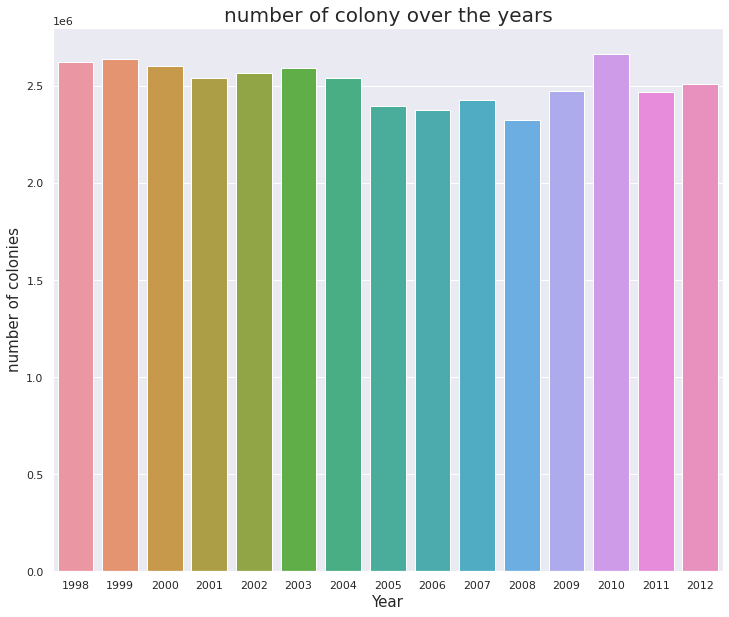

In [9]:
plt.figure(figsize=(12,10))
sns.barplot(x=num_2012.index,y=num_2012.values)
plt.title("number of colony over the years", size=20)
plt.xlabel("Year", size = 15)
plt.ylabel("number of colonies", size = 15)

Q6.Analyse the variation of yield per colony over the years and production trend at state level

production trend at state level



In [10]:

state = df['totalprod'].groupby(by=df['state'], axis=0, sort=False).sum().sort_values(ascending=False)
state.head()

state
ND    475085000.0
CA    347535000.0
SD    266141000.0
FL    247048000.0
MT    156562000.0
Name: totalprod, dtype: float64

Text(0, 0.5, 'Total production of honey in USA')

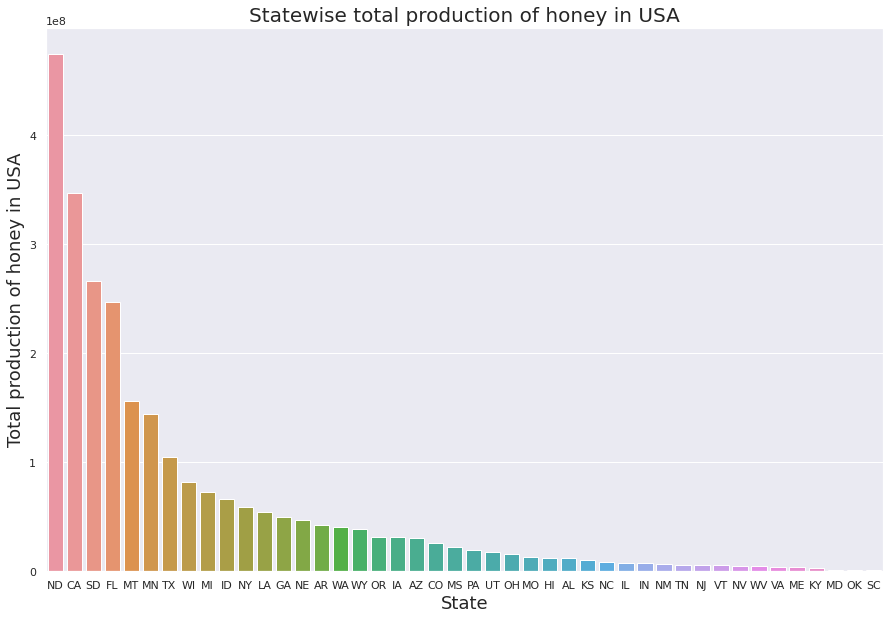

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(x=state.index,y=state.values) ## Barplot is useful, when we have categories, such as state
plt.title("Statewise total production of honey in USA", size=20)
plt.xlabel("State", size=18)
plt.ylabel("Total production of honey in USA", size = 18)

In [12]:
state1998 = df['totalprod'].groupby(by=df['state'].loc[df['year']==1998], axis=0).sum()
state_1998 = pd.DataFrame({'State_1998':state1998.index,'Total_Produced_1998':state1998.values})
## Grouping the data and creating a dataframe with it!
state_1998.tail(10)

,State_1998,Total_Produced_1998
33,SD,21375000.0
34,TN,448000.0
35,TX,7007000.0
36,UT,1740000.0
37,VA,296000.0
38,VT,384000.0
39,WA,2958000.0
40,WI,8099000.0
41,WV,330000.0
42,WY,2760000.0


In [13]:
state2012 = df['totalprod'].groupby(by=df['state'].loc[df['year']==2012], axis=0).sum() 
state_2012 = pd.DataFrame({'State_2012':state2012.index,'Total_Produced_2012':state2012.values})
## Grouping the data and creating a dataframe with it!
state_2012.tail(10)

,State_2012,Total_Produced_2012
30,SD,16380000.0
31,TN,366000.0
32,TX,4784000.0
33,UT,950000.0
34,VA,164000.0
35,VT,240000.0
36,WA,2542000.0
37,WI,4140000.0
38,WV,288000.0
39,WY,2550000.0


We see that there are missing states in 2012 dataset, maybed they stopped producing honey. We'll try to add them and sort by state again. We'll add these states with a value of 0.

In [14]:
print(state_1998['State_1998'].unique())
print(state_2012['State_2012'].unique())

['AL' 'AR' 'AZ' 'CA' 'CO' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY'
 'LA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE' 'NJ' 'NM' 'NV'
 'NY' 'OH' 'OK' 'OR' 'PA' 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV'
 'WY']
['AL' 'AR' 'AZ' 'CA' 'CO' 'FL' 'GA' 'HI' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY'
 'LA' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE' 'NJ' 'NM' 'NY' 'OH'
 'OR' 'PA' 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


We are missing MD, NV, and OK

In [15]:
missing = pd.DataFrame({'State_2012':['MD','NV', 'OK'], 'Total_Produced_2012':[0,0,0]})
state_2012 = state_2012.append(missing, ignore_index=True)
state_2012.tail(10)

,State_2012,Total_Produced_2012
33,UT,950000.0
34,VA,164000.0
35,VT,240000.0
36,WA,2542000.0
37,WI,4140000.0
38,WV,288000.0
39,WY,2550000.0
40,MD,0.0
41,NV,0.0
42,OK,0.0


Variance of Yield per colony

In [16]:
yield_2012 = df['yieldpercol'].loc[df['year']<2013].groupby(by=df['year']).sum() 
yield_2012.head()

year
1998    3008
1999    2815
2000    2906
2001    2840
2002    2939
Name: yieldpercol, dtype: int64

Text(0, 0.5, 'Yield')

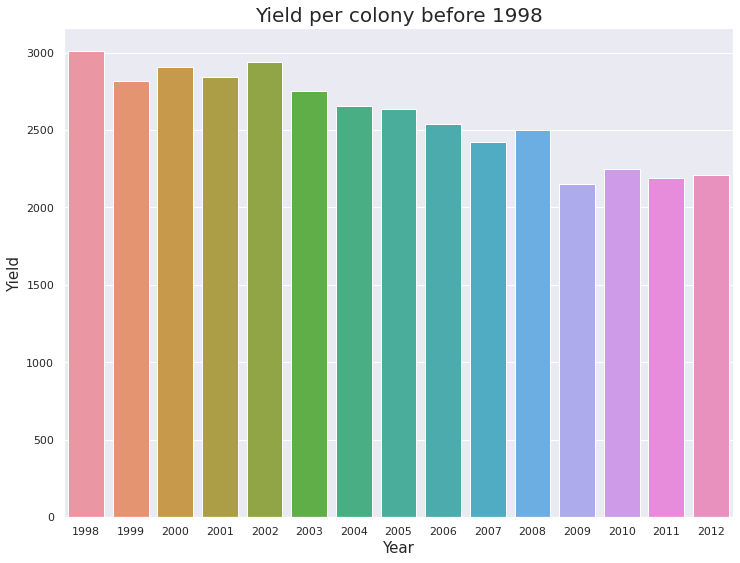

In [17]:
plt.figure(figsize=(12,9))
sns.barplot(x=yield_2012.index,y=yield_2012.values)
plt.title("Yield per colony before 1998", size=20)
plt.xlabel("Year", size = 15)
plt.ylabel("Yield", size = 15)

There's a strong tendency of decrease, this can be seen by plotting the data point and fitting a linear regression in it with seaborn regplot.

Q7.Declining production trend

In [18]:
US_state_max = df[['state','totalprod']].groupby('state').max()
US_state_max.reset_index(level=0,inplace=True)
US_state_max.columns = ['State','Max Prod']
US_state_max.head()

,State,Max Prod
0,AL,1248000.0
1,AR,4900000.0
2,AZ,3300000.0
3,CA,37350000.0
4,CO,2700000.0


In [19]:
US_state_min = df[['state','totalprod']].groupby('state').min()
US_state_min.reset_index(level=0,inplace=True)
US_state_min.columns = ['State','Min Prod']
US_state_min.head()

,State,Min Prod
0,AL,432000.0
1,AR,1368000.0
2,AZ,1012000.0
3,CA,11550000.0
4,CO,1200000.0


In [20]:
st_range = pd.merge(US_state_max,US_state_min,how='inner',on='State')
st_range.head()

,State,Max Prod,Min Prod
0,AL,1248000.0,432000.0
1,AR,4900000.0,1368000.0
2,AZ,3300000.0,1012000.0
3,CA,37350000.0,11550000.0
4,CO,2700000.0,1200000.0


In [21]:
st_range['Per_Change'] = ((st_range['Max Prod']-st_range['Min Prod'])/st_range['Max Prod'])*100
st_range.sort_values(by='Per_Change',ascending=False,inplace=True)
st_range.head()

,State,Max Prod,Min Prod,Per_Change
19,MO,1725000.0,344000.0,80.057971
26,NM,960000.0,246000.0,74.375000
16,ME,451000.0,120000.0,73.392461
15,MD,308000.0,84000.0,72.727273
12,KS,1120000.0,308000.0,72.500000


Text(0, 0.5, '% Decline')

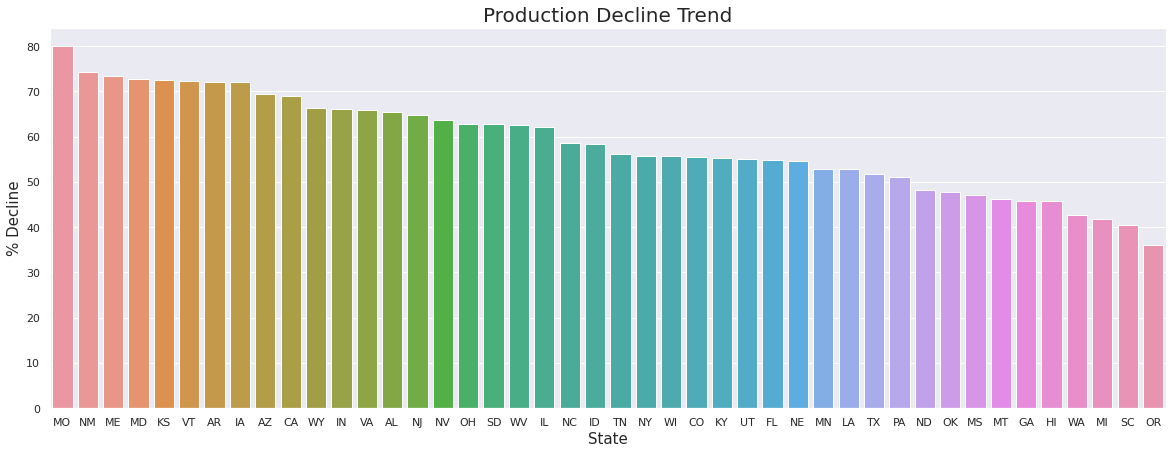

In [22]:
plt.figure(figsize=(20,7))
sns.barplot(x='State',y='Per_Change',data= st_range)
plt.title('Production Decline Trend',fontsize=20)
plt.xlabel("State",fontsize=15)
plt.ylabel("% Decline",fontsize=15)

The Bar chart explains the states MO,NM and ME are the highest percentage of decline in the honey production. The states OR,SC and MI are lowest decline in the honey production.